<a href="https://colab.research.google.com/github/BlackIce001/covid-19-analysis/blob/main/covid_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn requests scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'  # Replace with the actual URL of your COVID data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    with open('covid_data.csv', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully!")
else:
    print("Failed to download file. Status code:", response.status_code)

File downloaded successfully!


In [13]:
data = pd.read_csv('covid_data.csv')

# Check if 'Date' column exists (case-insensitive)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
elif 'date' in data.columns:
    # Handle lowercase 'date' column
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
else:
    print("Error: 'Date' column not found in the DataFrame. Check your CSV file.")

data.fillna(method='ffill', inplace=True)

# Feature Engineering
if 'Date' in data.index.names:
    data['Day'] = (data.index - data.index.min()).days  # Days since the first date
elif 'date' in data.index.names:
    data['Day'] = (data.index - data.index.min()).days  # Days since the first date

In [15]:
# Print available columns to verify if 'Confirmed' exists
print(data.columns)

# If 'Confirmed' is not present, adjust 'target' to the correct column name
# For example, if the column is named 'total_cases', change the following line:
target = 'total_cases'

X = data[features]
y = data[target]

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [20]:
# Impute missing values in 'y_train' using the mean
y_train_imputed = y_train.fillna(y_train.mean())

# Fit the model using the imputed target variable
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_imputed)



LinearRegression()

In [22]:
# Impute missing values in 'y_train' using the mean
y_train_imputed = y_train.fillna(y_train.mean())

# Fit the model using the imputed target variable
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_imputed) # Use imputed y_train


RandomForestRegressor(random_state=42)

In [23]:
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')


Linear Regression Mean Squared Error: 6646192599324353.0
Linear Regression R^2 Score: -0.008748164358447719


In [24]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')


Random Forest Mean Squared Error: 6597094209370154.0
Random Forest R^2 Score: -0.0012960916116711019


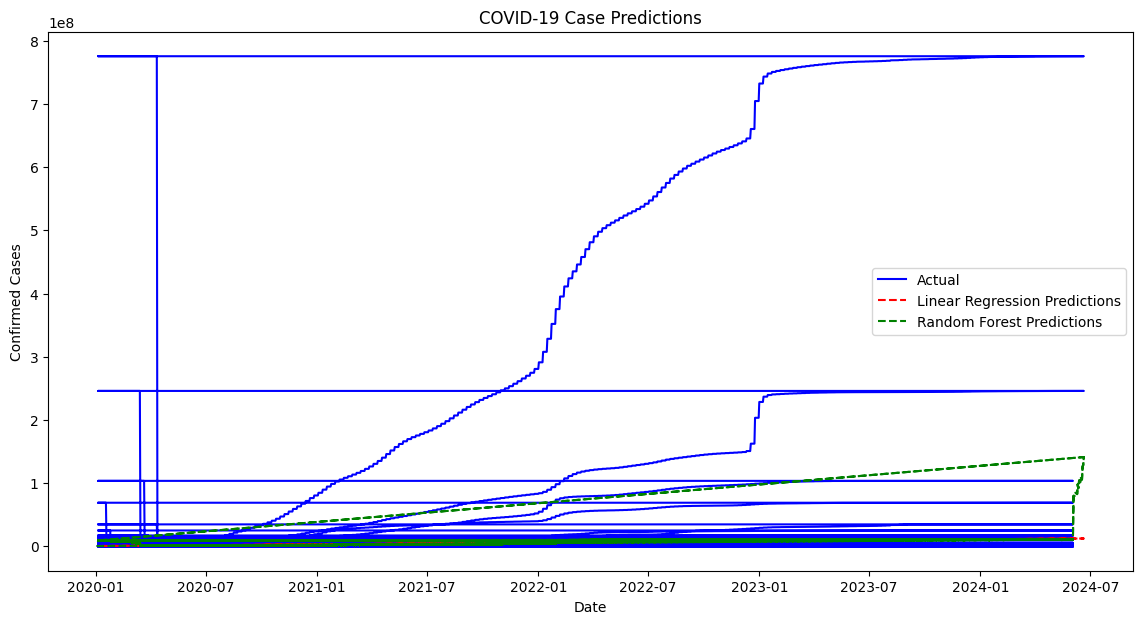

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Predictions', linestyle='--', color='red')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Predictions', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Case Predictions')
plt.legend()
plt.show()
